In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [5]:
data.index = pd.to_datetime(data.index)

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


In [13]:
data = data.dropna()
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [14]:
split1 = int(len(data)*.6)
split2 = int(len(data)*.9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [15]:
data_in

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04
...,...,...,...,...
1997-07-01,5.52,4.9,1437.0,160.40
1997-08-01,5.54,4.8,1390.0,160.80
1997-09-01,5.54,4.9,1546.0,161.20
1997-10-01,5.50,4.7,1520.0,161.50


In [18]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [19]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out) 
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [32]:
model1 = sm.OLS(y_in, X_in).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        15:03:35   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529

# 4.) Recreate the graph from your model

In [22]:
import matplotlib.pyplot as plt

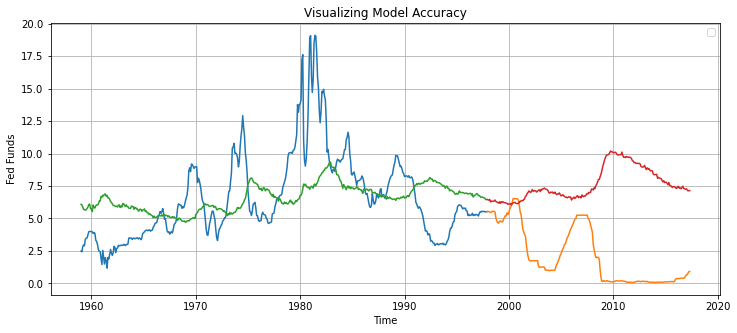

In [27]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [34]:
from sklearn.metrics import mean_squared_error

In [36]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [37]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
max_degrees = 3

DEGREE :  1


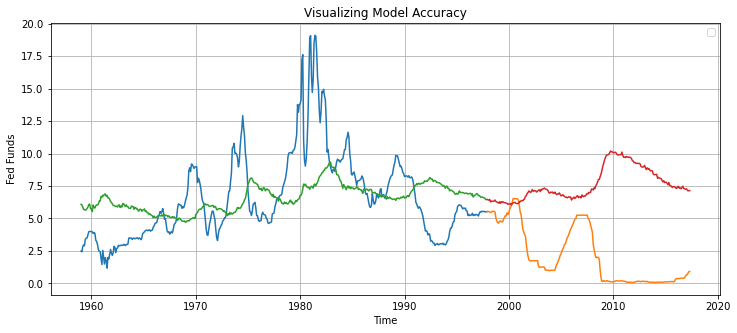

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566782
DEGREE :  2


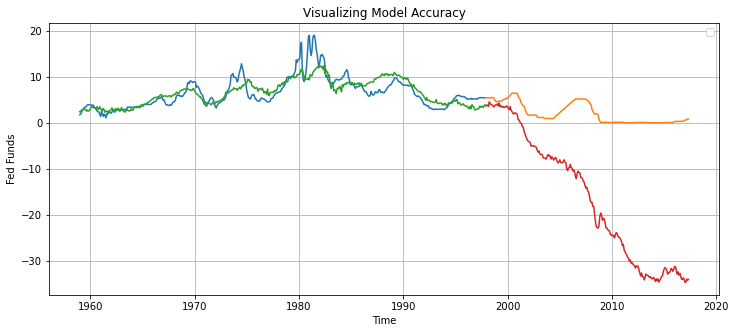

Insample MSE :  3.8634771392760685
Outsample MSE :  481.4465099294859
DEGREE :  3


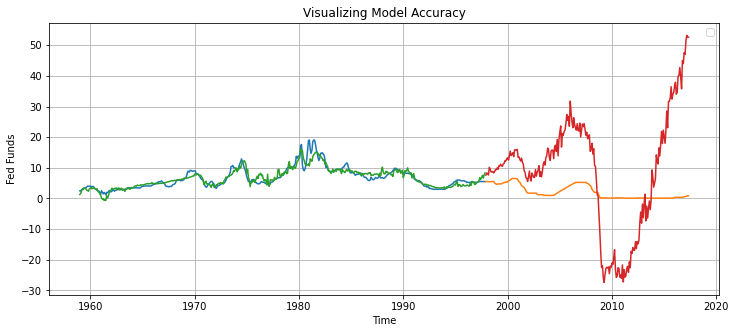

Insample MSE :  1.872363626650649
Outsample MSE :  371.76804093810324


In [58]:
for degrees in range (1, max_degrees + 1):
    print ("DEGREE : ", degrees)
    poly = PolynomialFeatures(degree =degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))
    
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(data_in.index,model1.predict(X_in_poly))
    plt.plot(data_out.index,model1.predict(X_out_poly))
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

- As we increase the polynomial degree of the model, the in-sample MSE decreases. It indicates improved fit to the training data.
- Higher polynomial degree does not lead to better out-of-sample performance because the out-sample MSE is higher when the model becomes more complex.